## Compare how well signals estimation works in the noise vs noiseless setting

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from models.ICA_EM import *
import importlib, sys
from models.metrics import *
from models.dgp import *
importlib.reload(sys.modules['models.ICA_EM'])

<module 'models.ICA_EM' from '/Users/marvinlob/Documents/coding/eth/semester_project/ICA/models/ICA_EM.py'>

In [3]:
n = 1000
J  = 9
I = J-1
random_seed = 0
causal_data = dgp_extended(noise_dict={"loc" : 0, "scale" : 0}, prior={"loc" : 0, "scale" : 1/np.sqrt(2)})


In [42]:
causal_data.generate_data(n,I,J, random_state=random_seed, init_range= [1,3])
print(np.round(causal_data.mixing_matrix_observed,2))

[[ 0.    1.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    1.    0.    0.    0.    0.    0.    0.  ]
 [-0.   -0.   -0.    1.   -0.   -0.   -0.   -0.   -0.  ]
 [ 0.    0.    0.    0.    1.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    1.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    1.    0.    0.  ]
 [ 1.28  1.39  1.74  2.64  1.19  2.68  1.19  1.   -0.  ]
 [ 4.53  3.93  4.63  4.35  3.04  4.55  3.07  1.24  1.  ]]


In [43]:
def whiten_data(data):
    #center data
    data = data - np.mean(data, axis=0)
    # cov should be identity
    cov = np.cov(data.T)
    # whiten data with cholesky decomposition
    L = np.linalg.cholesky(np.linalg.inv(cov))
    data = np.dot(data, L.T)
    return {"data": data, "whitening_matrix": L}


In [45]:
causal_data.generate_data(n,I,J, random_state=random_seed)
whitening = whiten_data(causal_data.data_observed)
CausalVarEM_est = CausalVarEM(max_iter=200, random_seed=0, true_A=None, tol=1e-5, mode = "lower_triangular", init_range= [1,4])
CausalVarEM_est.fit(causal_data.data_observed, J)

Initializing A randomly


Diff: 0.3211: 100%|██████████| 200/200 [00:07<00:00, 25.49it/s]


Estimating the signals


100%|██████████| 1000/1000 [00:00<00:00, 32199.73it/s]


### plot non causal setting

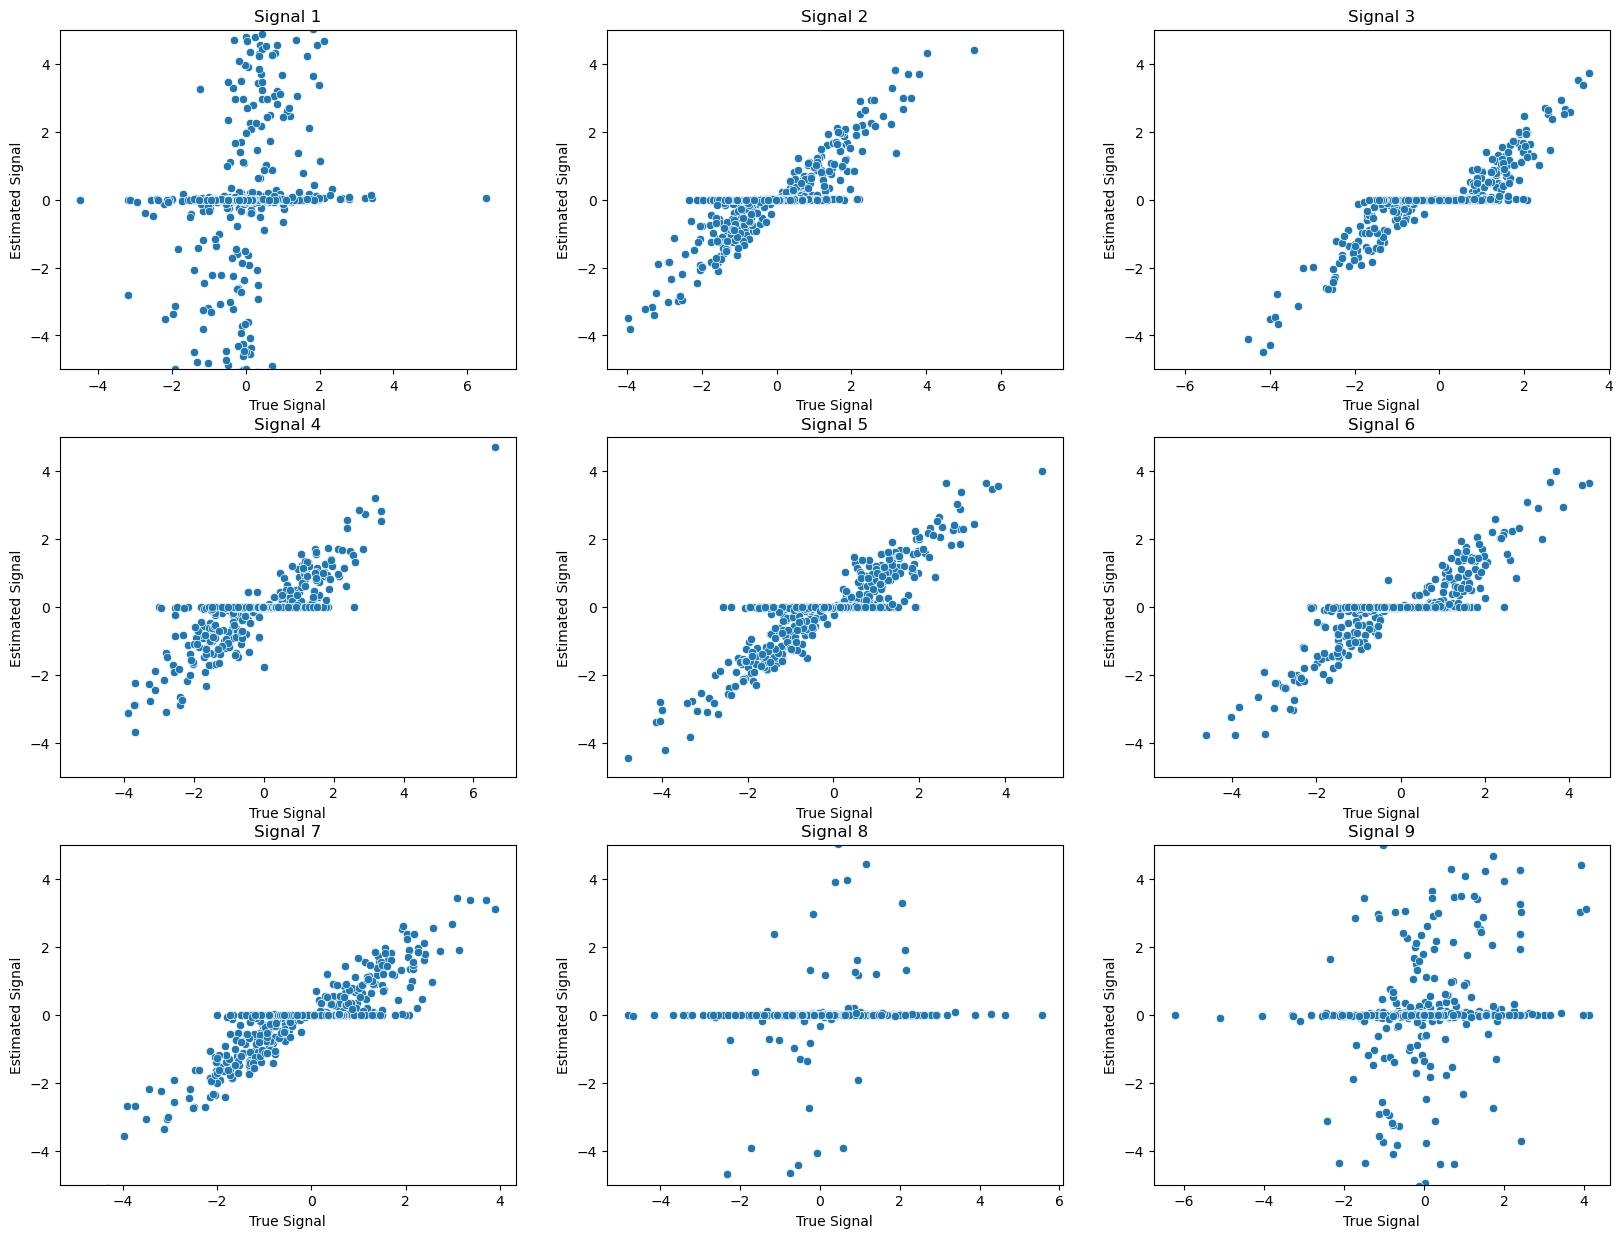

In [46]:
best_perm, score = f_score(CausalVarEM_est.A, causal_data.mixing_matrix_observed)
causal_var_signals = CausalVarEM_est.Signals[:,best_perm]
# reconstruct the signals

fig, ax = plt.subplots(3, 3, figsize=(20,15))
for i in range(J):
    
    # odering the signals
    sns.scatterplot(x = causal_data.signals[:,i], y = causal_var_signals[:,i], ax = ax[i//3, i%3])
    ax[i//3, i%3].set_ylim(-5,5)
    ax[i//3, i%3].set_title("Signal " + str(i+1))
    ax[i//3, i%3].set_xlabel("True Signal")
    ax[i//3, i%3].set_ylabel("Estimated Signal")

plt.show()




In [10]:
np.sum(causal_var_signals[:,0]>.01)

179